#1. Chapter06 p.52 [LAB] 우수 초콜릿 분석

- 우수 초콜릿 분석
- 한 가지 주제를 결정하여  분석

## ▶ 실습내용
1) 데이터 파일
- 데이터의 첫 번째 열은 초콜릿 번호,
- 두 번째 열은 평점을 기록한 연도,
- 세 번째 열은 카카오 함유율,
- 네 번째 열은 평점

2) 우수초콜릿 분석 기준
- 연도별 카카오함유율에 따른 선호도 변화 추이
- 추이 시각화

In [1]:
import numpy as np
data = np.loadtxt('/content/chocolate_rating.csv', delimiter=',')
print('차원', data.ndim)
print('모양', data.shape)
print('원소 수:',data.size)
print(data)

ModuleNotFoundError: No module named 'numpy'

In [ ]:
# 카카오 함유율 구간 정의 함수
def get_cacao_bin(cacao_percent):
    return int(round(cacao_percent*100,-1))  # 예: 0.78 → 70

# 적용
cacao_bins = np.vectorize(get_cacao_bin)(data[:, 2])
data_with_bins = np.column_stack((data, cacao_bins))

print(cacao_bins)
print(data_with_bins)

[60 70 70 ... 60 60 60]
[[1.000e+00 2.016e+03 6.300e-01 3.750e+00 6.000e+01]
 [2.000e+00 2.015e+03 7.000e-01 2.750e+00 7.000e+01]
 [3.000e+00 2.015e+03 7.000e-01 3.000e+00 7.000e+01]
 ...
 [1.793e+03 2.011e+03 6.500e-01 3.500e+00 6.000e+01]
 [1.794e+03 2.011e+03 6.200e-01 3.250e+00 6.000e+01]
 [1.795e+03 2.010e+03 6.500e-01 3.000e+00 6.000e+01]]


In [ ]:

results = []

years = np.unique(data_with_bins[:,1].astype(int))
cacao_levels = np.unique(data_with_bins[:,4])

for year in years:
    year_data = data_with_bins[data_with_bins[:,1] == year]
    for cacao_bin in cacao_levels:
        subset = year_data[year_data[:,4] == cacao_bin]
        if len(subset) >= 3:  # 충분한 샘플 수
            mean_rating = np.mean(subset[:, 3]) # 연도별 카카오구간에 따른 평점 평균
            results.append([year, cacao_bin, mean_rating, len(subset)])


In [ ]:
results = np.array(results)
results = results[np.lexsort((results[:,1], results[:,0]))]  # 연도-카카오순 정렬

# 출력
print("연도 | 카카오구간 | 평균평점 | 리뷰수")
for r in results:
    cacao_range = '100%' if r[1] == 100  else f"{int(r[1])}~{int(r[1])+9}"
    print(f"{int(r[0])}   | {cacao_range}  | {r[2]:.2f}     | {int(r[3])}")


연도 | 카카오구간 | 평균평점 | 리뷰수
2006   | 60~69  | 3.06     | 18
2006   | 70~79  | 3.10     | 26
2006   | 80~89  | 3.36     | 25
2007   | 60~69  | 3.27     | 12
2007   | 70~79  | 3.27     | 41
2007   | 80~89  | 3.05     | 21
2008   | 60~69  | 3.10     | 13
2008   | 70~79  | 3.15     | 48
2008   | 80~89  | 2.85     | 26
2008   | 90~99  | 2.42     | 3
2008   | 100%  | 2.00     | 3
2009   | 60~69  | 3.17     | 29
2009   | 70~79  | 3.14     | 58
2009   | 80~89  | 2.92     | 34
2010   | 60~69  | 3.14     | 21
2010   | 70~79  | 3.23     | 59
2010   | 80~89  | 3.08     | 27
2011   | 60~69  | 3.21     | 24
2011   | 70~79  | 3.29     | 108
2011   | 80~89  | 3.17     | 30
2011   | 90~99  | 3.25     | 3
2012   | 60~69  | 3.09     | 20
2012   | 70~79  | 3.26     | 131
2012   | 80~89  | 2.99     | 41
2013   | 60~69  | 3.06     | 21
2013   | 70~79  | 3.25     | 113
2013   | 80~89  | 3.22     | 37
2013   | 90~99  | 3.20     | 5
2013   | 100%  | 2.64     | 7
2014   | 60~69  | 3.10     | 15
2014   | 70~79  | 3.

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
import warnings
import logging
import matplotlib.pyplot as plt

logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


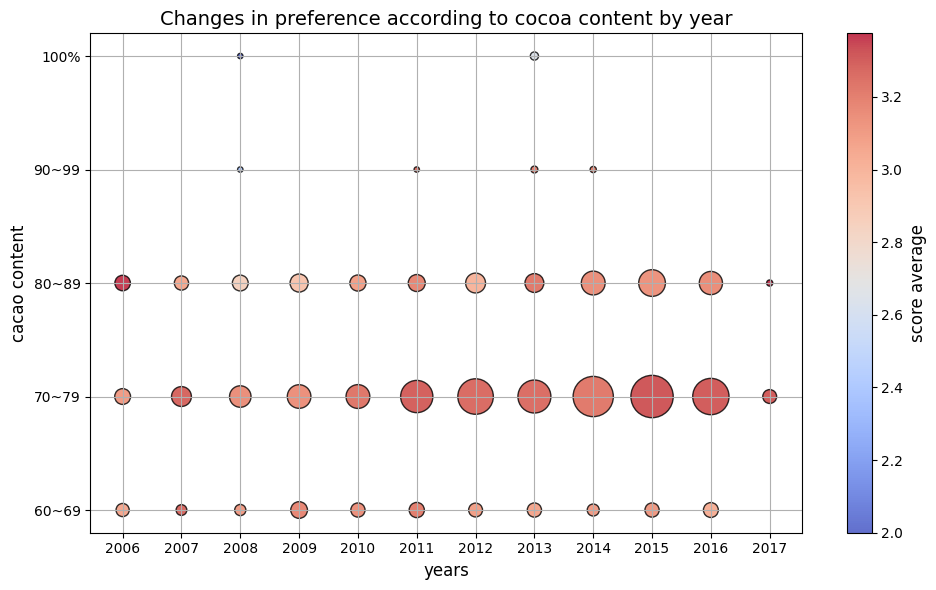

In [ ]:
# 데이터 분리
years = results[:, 0].astype(int)
cacao_range = results[:, 1].astype(int)
ratings = results[:, 2]
review_counts = results[:, 3].astype(int)

# 시각화
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    years,
    cacao_range,
    c=ratings,
    s=review_counts * 5,  # 리뷰 수에 따라 점 크기 조정
    cmap='coolwarm',
    alpha=0.8,
    edgecolor='black'
)

# 컬러바 및 라벨
cbar = plt.colorbar(scatter)
cbar.set_label("score average", fontsize=12)

# 눈금 및 라벨
plt.xticks(sorted(np.unique(years)))
plt.yticks(sorted(np.unique(cacao_range)), labels=[f"{int(c)}~{int(c)+9}" if c != 100 else "100%" for c in sorted(np.unique(cacao_range))])
plt.xlabel("years", fontsize=12)
plt.ylabel("cacao content", fontsize=12)
plt.title("Changes in preference according to cocoa content by year", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Chapter06 p.93 [LAB] 강의 시간표 분석

- 최대 시간수
- 한 가지 주제를 결정하여 분석

## ▶ 100개의 무작위 데이터생성

In [11]:
import random

# 열 이름
col_names = ['과목번호', '과목명', '강의실', '시간수', '교수']

# 단어 조합 요소
prefixes = ['인공지능', '데이터', '감성', '지식', '알고리즘', '미디어', '스마트', '정보', '코딩', '컴퓨팅']
suffixes = ['개론', '입문', '실습', '응용', '이론', '기초', '프로그래밍', '특론', '분석', '설계']

# 강의실 & 교수
rooms = ['R1', 'R2', 'R3', 'R4', 'R5']
professors = ['김민지', '이정훈', '박서연', '최지우', '정우성', '한지민', '유재석', '장도연', '신하균', '김태리']

# 랜덤 과목 100개 생성
random.seed(42)
list1 = []

for i in range(1, 101):
    course_id = f"C{i:03d}"
    course_name = random.choice(prefixes) + random.choice(suffixes)
    room = random.choice(rooms)
    hours = random.randint(1, 4)
    professor = random.choice(professors)

    list1.append([course_id, course_name, room, hours, professor])

# 예시 출력
for row in list1[:]:
    print(row)


['C001', '데이터개론', 'R3', 2, '최지우']
['C002', '감성입문', 'R5', 1, '김태리']
['C003', '스마트개론', 'R1', 1, '최지우']
['C004', '지식분석', 'R5', 1, '신하균']
['C005', '지식분석', 'R4', 2, '장도연']
['C006', '컴퓨팅이론', 'R1', 2, '유재석']
['C007', '미디어이론', 'R2', 2, '한지민']
['C008', '데이터입문', 'R4', 1, '한지민']
['C009', '미디어설계', 'R3', 1, '장도연']
['C010', '코딩입문', 'R4', 1, '신하균']
['C011', '알고리즘설계', 'R3', 2, '이정훈']
['C012', '인공지능응용', 'R3', 1, '최지우']
['C013', '데이터프로그래밍', 'R3', 4, '한지민']
['C014', '감성기초', 'R3', 2, '정우성']
['C015', '데이터설계', 'R2', 2, '박서연']
['C016', '정보프로그래밍', 'R3', 2, '한지민']
['C017', '인공지능응용', 'R1', 3, '유재석']
['C018', '알고리즘입문', 'R2', 3, '최지우']
['C019', '정보프로그래밍', 'R4', 2, '정우성']
['C020', '감성응용', 'R5', 3, '김태리']
['C021', '스마트설계', 'R4', 3, '최지우']
['C022', '감성분석', 'R4', 1, '김민지']
['C023', '데이터실습', 'R2', 4, '김태리']
['C024', '데이터프로그래밍', 'R4', 4, '신하균']
['C025', '알고리즘분석', 'R1', 1, '신하균']
['C026', '알고리즘기초', 'R1', 3, '유재석']
['C027', '감성특론', 'R1', 3, '신하균']
['C028', '감성분석', 'R1', 3, '신하균']
['C029', '컴퓨팅응용', 'R2', 3, '박서연']
['C030'

In [12]:
import pandas as pd

df = pd.DataFrame(list1, columns=col_names)
df.to_csv('./timetable.csv', header=True, index=False, encoding='utf-8')


In [14]:
df2 = pd.read_csv('./timetable.csv', sep=',')

df2


,과목번호,과목명,강의실,시간수,교수
0,C001,데이터개론,R3,2,최지우
1,C002,감성입문,R5,1,김태리
2,C003,스마트개론,R1,1,최지우
3,C004,지식분석,R5,1,신하균
4,C005,지식분석,R4,2,장도연
...,...,...,...,...,...
95,C096,데이터이론,R5,3,이정훈
96,C097,지식이론,R2,2,박서연
97,C098,인공지능개론,R2,4,김태리
98,C099,데이터특론,R4,2,유재석


## ▶ 실습내용
- 교수님을 기준으로 그룹화하여 최대 시간수 구함

In [16]:
max_hour = df2.groupby(by=['교수'],
                       as_index=False)['시간수'].max()
max_hour


,교수,시간수
0,김민지,3
1,김태리,4
2,박서연,4
3,신하균,4
4,유재석,4
5,이정훈,4
6,장도연,3
7,정우성,4
8,최지우,4
9,한지민,4


from matplotlib import pyplot as plt
max_hour['시간수'].plot(kind='hist', bins=20, title='시간수')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
max_hour['시간수'].plot(kind='line', figsize=(8, 4), title='시간수')
plt.gca().spines[['top', 'right']].set_visible(False)